Mental Health in Tech: People working in tech are often at their desks for extended amounts of time. Explore how this trend correlates with mental health. Examine the data coollected through surveys search for trends. Find out if there is a link between mental health and companies that offer wellness programs. What do the results show you about the state of mental health in tech? Can you suggest steps that companies can take to help their employees?

MAIN QUESTIONS

1.Does remote work affect an individual's mental health more compared to someone who works on site?(self employed VS work in organisation ) (Jane)

2.Do males seek mental health treatments less often than females in tech companies? (Loku)

3.Is mental health more prevalent in different regions?(US) Does US have a bigger issue with mental health compared to other countries?(Keegan)

4.Does mental health interfere with work? (Lishi )(more grouping - split by company size, family history, males/females)


Checking to see how US seeks treatment compared to other regions.

Overall, More than half of the data suggests that US has more problems with mental and US is more likely to seek treakment.


In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
import numpy as np
import os
import seaborn.objects as so


import requests
import time
from scipy import stats
from scipy.stats import linregress
import os

import hvplot.pandas






In [2]:
#Keegan Code

In [3]:
if not os.path.exists("output"):
    os.makedirs("output")


# Define the path to the CSV file
file_path = Path('files/mental_heath_2016.csv')  # Replace 'your_file_name.csv' with the actual file name

# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Display the DataFrame
data_df.head()

#print(data_df.columns.tolist())  # This will print a list of the column names

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [4]:
#rename coloumns then put into new DF

# Display the original DataFrame
#print("Original DataFrame:")
#print(data_df.head())
#data_df.head()

location_df = data_df.copy()  # Create a copy of the modified DataFrame, so it does not affect original file.


# Rename the columns
location_df.rename(columns={
    'Are you self-employed?': 'Self-Employed?',
    'How many employees does your company or organization have?': 'Number of Employees',
    'What country do you live in?': 'Location',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'Diagnosed by professional?',
    'Do you currently have a mental health disorder?':'Current mental disorder',
    'If yes, what condition(s) have you been diagnosed with?':'Diagnosis',
    'Have you ever sought treatment for a mental health issue from a mental health professional?':'Seek treatment?',
    'What is your age?':'Age',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?':'Help offered?'
    # Add more columns if needed
}, inplace=True)

#0 = No
#1 = Yes
#need to change these answers

#Columns to only include in DF
location_df = location_df[['Self-Employed?', 'Seek treatment?', 'Location','Number of Employees','Diagnosed by professional?'
                            ,'Current mental disorder','Diagnosis','Age','Help offered?']]

# Display the DataFrame with renamed columns
print("DataFrame with Renamed Columns:")
location_df.head()

DataFrame with Renamed Columns:


,Self-Employed?,Seek treatment?,Location,Number of Employees,Diagnosed by professional?,Current mental disorder,Diagnosis,Age,Help offered?
0,0,0,United Kingdom,26-100,Yes,No,NaN,39,No
1,0,1,United States of America,6-25,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",29,Yes
2,0,1,United Kingdom,6-25,No,No,NaN,38,No
3,1,1,United Kingdom,NaN,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",43,NaN
4,0,1,United States of America,6-25,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",43,No


In [5]:
print("\nNew Column Names:")
print(location_df.columns.tolist())

#data_df


New Column Names:
['Self-Employed?', 'Seek treatment?', 'Location', 'Number of Employees', 'Diagnosed by professional?', 'Current mental disorder', 'Diagnosis', 'Age', 'Help offered?']


In [6]:
# Check for NaN values in the DataFrame
na_counts = location_df.isna().sum()

# Display the count of NaN values for each column
print("Count of NaN values in each column:")
print(na_counts)

# Check if there are any NaN values in the DataFrame
has_na = location_df.isna().any().any()

if has_na:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")


Count of NaN values in each column:
Self-Employed?                  0
Seek treatment?                 0
Location                        0
Number of Employees           287
Diagnosed by professional?      0
Current mental disorder         0
Diagnosis                     865
Age                             0
Help offered?                 287
dtype: int64
There are NaN values in the DataFrame.


In [7]:
#change 0 and 1 values to be yes or no coloumn
location_df["Self-Employed?"] = location_df["Self-Employed?"].replace({0: "No", 1: "Yes"})
location_df["Seek treatment?"] = location_df["Seek treatment?"].replace({0: "No", 1: "Yes"})

location_df

,Self-Employed?,Seek treatment?,Location,Number of Employees,Diagnosed by professional?,Current mental disorder,Diagnosis,Age,Help offered?
0,No,No,United Kingdom,26-100,Yes,No,NaN,39,No
1,No,Yes,United States of America,6-25,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",29,Yes
2,No,Yes,United Kingdom,6-25,No,No,NaN,38,No
3,Yes,Yes,United Kingdom,NaN,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",43,NaN
4,No,Yes,United States of America,6-25,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",43,No
...,...,...,...,...,...,...,...,...,...
1428,Yes,Yes,United States of America,NaN,No,No,NaN,34,NaN
1429,Yes,No,United States of America,NaN,Yes,No,NaN,56,NaN
1430,No,Yes,United States of America,100-500,Yes,Maybe,NaN,52,Yes
1431,No,No,United States of America,100-500,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",30,Yes


In [8]:
#Filtering for US VS Outside Seeking treatment and not seeking treatment

#filter data for countries
us_data = location_df[location_df['Location'] == 'United States of America']
other_countries_data = location_df[location_df['Location'] != 'United States of America']

# Analyze the Data
# 'treatment' column to see how many people sought treatment
us_treatment_count = us_data['Seek treatment?'].value_counts()  # Remove normalize=True
other_countries_treatment_count = other_countries_data['Seek treatment?'].value_counts()  

# Filter to only include results where treatment = 'Yes'
us_treatment_yes = us_treatment_count.get('Yes', 0)  # Get the count for 'Yes', default to 0 if not found
other_countries_treatment_yes = other_countries_treatment_count.get('Yes', 0)  # Same for other countries

# Filter to only include results where treatment = 'No'
us_treatment_no = us_treatment_count.get('No', 0)  # Get the count for 'No', default to 0 if not found
other_countries_treatment_no = other_countries_treatment_count.get('No', 0)  # Same for other countries

# NO treatment DataFrame for comparison
country_comparison_no_df = pd.DataFrame({
    'US': [us_treatment_no],
    'Other Countries': [other_countries_treatment_no]
})

# Yes treatment DataFrame for comparison for getting treatment
country_comparison_yes_df = pd.DataFrame({
    'US': [us_treatment_yes],
    'Other Countries': [other_countries_treatment_yes]
})

print("Yes for treatment")
print(country_comparison_yes_df)
#country_comparison_df

print("No for treatment")
print(country_comparison_no_df)
#country_comparison_no_df

Yes for treatment
    US  Other Countries
0  550              289
No for treatment
    US  Other Countries
0  290              304


In [9]:
#Note 840 for location in USA and 593 outside USA
#other_countries_data.count()
#us_data.count()

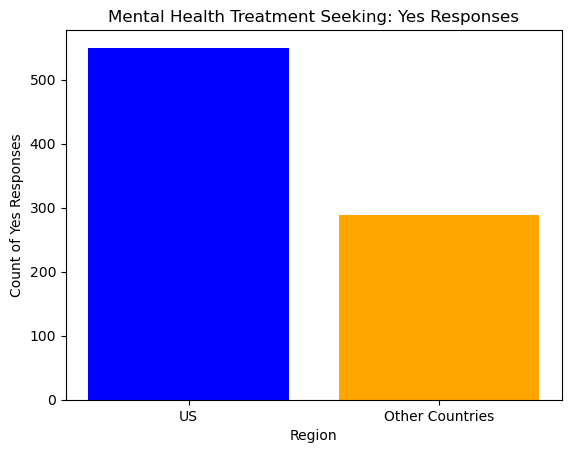

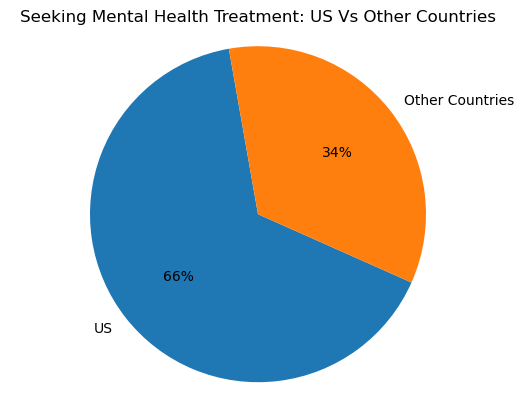

In [10]:
# Data for plotting Yes to treatment
labels = ['US', 'Other Countries']
values = [us_treatment_yes, other_countries_treatment_yes]  # Use the 'Yes' counts

# Create a bar graph
plt.bar(labels, values, color=['blue', 'orange'])

# Add title and labels
plt.title('Mental Health Treatment Seeking: Yes Responses')  # Title for Yes responses
plt.xlabel('Region')
plt.ylabel('Count of Yes Responses')  # Y-axis label for Yes responses

# Show the graph
plt.show()

# Data for plotting
sizes = [us_treatment_yes, other_countries_treatment_yes]  # Use the 'Yes' counts

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=100)  # Display whole numbers for percentages
plt.title('Seeking Mental Health Treatment: US Vs Other Countries')  # Title for Yes responses
plt.axis('equal')

# Show the chart
plt.show()

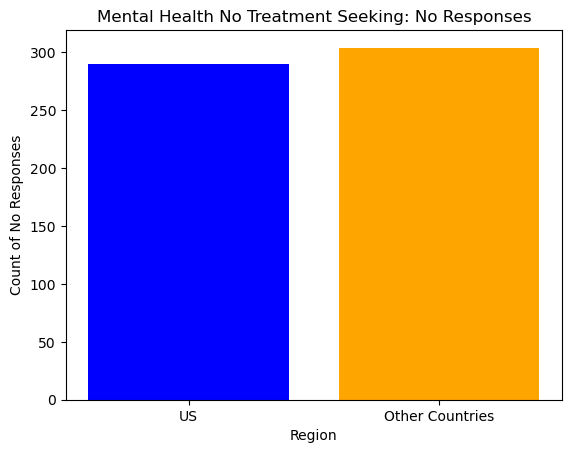

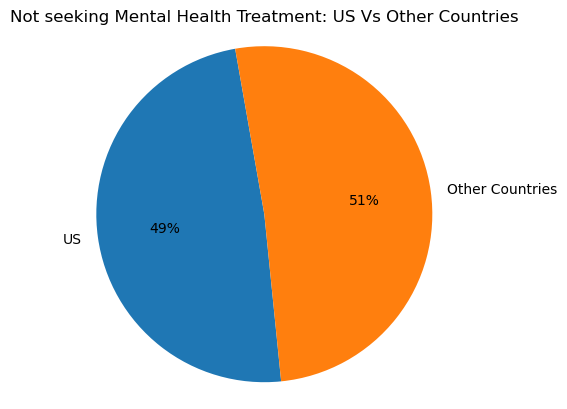

In [11]:
# Data for plotting No seek help
labels = ['US', 'Other Countries']
values = [us_treatment_no, other_countries_treatment_no]  # Use the 'No' counts

# Create a bar graph
plt.bar(labels, values, color=['blue', 'orange'])

# Add title and labels
plt.title('Mental Health No Treatment Seeking: No Responses')  # Title for Yes responses
plt.xlabel('Region')
plt.ylabel('Count of No Responses')  # Y-axis label for Yes responses

# Show the graph
plt.show()

# Data for plotting
sizes = [us_treatment_no, other_countries_treatment_no]  # Use the 'Yes' counts

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=100)  # Display whole numbers for percentages
plt.title('Not seeking Mental Health Treatment: US Vs Other Countries')  # Title for Yes responses
plt.axis('equal')

# Show the chart
plt.show()

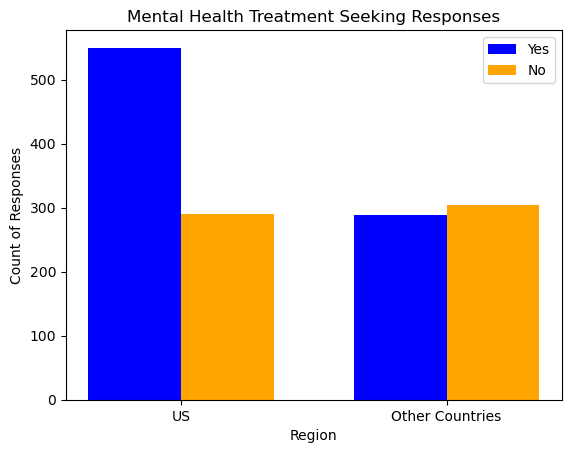

In [12]:
#both bar graphs combined

# Data for plotting
labels = ['US', 'Other Countries']
yes_values = [us_treatment_yes, other_countries_treatment_yes]  # Yes counts
no_values = [us_treatment_no, other_countries_treatment_no]  # No counts

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create a bar graph
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, yes_values, width, label='Yes', color='blue')
bars2 = ax.bar(x + width/2, no_values, width, label='No', color='orange')

# Add title and labels
ax.set_title('Mental Health Treatment Seeking Responses')
ax.set_xlabel('Region')
ax.set_ylabel('Count of Responses')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("output/mental_health_treatment_responses.png")# save graph as image

# Show the graph
plt.show()



Mental Health Treatment Seeking (USA vs Outside USA)

Our data indicates that individuals in the USA are significantly more likely to seek mental health treatment, with the number of responses seeking help being doubled compared to countries outside the USA.


In contrast, there is a slight increase in the number of individuals outside the USA who report not seeking treatment. 
This disparity may suggest that mental health is prioritized more highly in the USA compared to other countries, highlighting potential cultural differences in the perception and importance of mental health care.


USA - YES: 550 - NO: 289

Outside USA - Yes: 290 - NO: 304


In [13]:
usa_diagnosed_data = us_data[(us_data['Location'] == 'United States of America') & 
                         (us_data['Diagnosed by professional?'] == 'Yes')]

other_diagnosed_data = other_countries_data[(other_countries_data['Location'] != 'United States of America') & 
                         (other_countries_data['Diagnosed by professional?'] == 'Yes')]

#other_countries_data = location_df[location_df['Location'] != 'United States of America']



In [14]:
usa_diagnosed_count = len(usa_diagnosed_data)  # Count of diagnosed cases in the USA
other_diagnosed_count = len(other_diagnosed_data)  # Count for other countries

# Create a DataFrame
yes_diagnosed_df = pd.DataFrame({
    'Location': ['United States', 'Other Countries'],
    'Diagnosed Cases': [usa_diagnosed_count, other_diagnosed_count]
})

# Display the DataFrame for visualization
#print(USA_treatment_df)
yes_diagnosed_df

,Location,Diagnosed Cases
0,United States,473
1,Other Countries,243


In [15]:
no_usa_diagnosed_data = us_data[(us_data['Location'] == 'United States of America') & 
                         (us_data['Diagnosed by professional?'] == 'No')]

no_other_diagnosed_data = other_countries_data[(other_countries_data['Location'] != 'United States of America') & 
                         (other_countries_data['Diagnosed by professional?'] == 'No')]

#other_countries_data = location_df[location_df['Location'] != 'United States of America']

# Count of diagnosed cases with 'No' in the USA and other countries
no_usa_diagnosed_count = len(no_usa_diagnosed_data)  # Count of diagnosed cases in the USA
no_other_diagnosed_count = len(no_other_diagnosed_data)  # Count for other countries

# Create a DataFrame for visualization
no_diagnosed_df = pd.DataFrame({
    'Location': ['United States', 'Other Countries'],
    'Not Diagnosed Cases': [no_usa_diagnosed_count, no_other_diagnosed_count]
})

# Display the DataFrame for visualization
#print(no_diagnosed_df)
no_diagnosed_df

,Location,Not Diagnosed Cases
0,United States,367
1,Other Countries,350


In [16]:
#Check for common diagnosis in every location

diagnosis_location_df = location_df[['Location','Diagnosis','Age','Diagnosed by professional?','Help offered?']].copy()
diagnosis_location_df

,Location,Diagnosis,Age,Diagnosed by professional?,Help offered?
0,United Kingdom,NaN,39,Yes,No
1,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",29,Yes,Yes
2,United Kingdom,NaN,38,No,No
3,United Kingdom,"Anxiety Disorder (Generalized, Social, Phobia,...",43,Yes,NaN
4,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",43,Yes,No
...,...,...,...,...,...
1428,United States of America,NaN,34,No,NaN
1429,United States of America,NaN,56,Yes,NaN
1430,United States of America,NaN,52,Yes,Yes
1431,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",30,Yes,Yes


In [17]:
# Create a copy of the DataFrame
diagnosis_location_df = diagnosis_location_df.copy()

# Drop rows with NaN values in 'Diagnosis' column
diagnosis_location_df.dropna(subset=['Diagnosis'], inplace=True)

# Display the cleaned DataFrame
#print(diagnosis_location_df_copy)
diagnosis_location_df

,Location,Diagnosis,Age,Diagnosed by professional?,Help offered?
1,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",29,Yes,Yes
3,United Kingdom,"Anxiety Disorder (Generalized, Social, Phobia,...",43,Yes,NaN
4,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",43,Yes,No
5,United Kingdom,"Anxiety Disorder (Generalized, Social, Phobia,...",42,No,Yes
7,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",37,Yes,Yes
...,...,...,...,...,...
1424,Canada,"Anxiety Disorder (Generalized, Social, Phobia,...",22,Yes,No
1426,Canada,Attention Deficit Hyperactivity Disorder,26,Yes,I don't know
1427,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",38,Yes,No
1431,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",30,Yes,Yes


In [18]:
#unique_diagnoses = diagnosis_location_df['Diagnosis'].unique()
#print(unique_diagnoses)

Primary_Diagnosis
Anxiety Disorder (Generalized, Social, Phobia, etc)         306
Mood Disorder (Depression, Bipolar Disorder, etc)           146
Attention Deficit Hyperactivity Disorder                     23
Post-traumatic Stress Disorder                                8
Psychotic Disorder (Schizophrenia, Schizoaffective, etc)      6
Name: count, dtype: int64


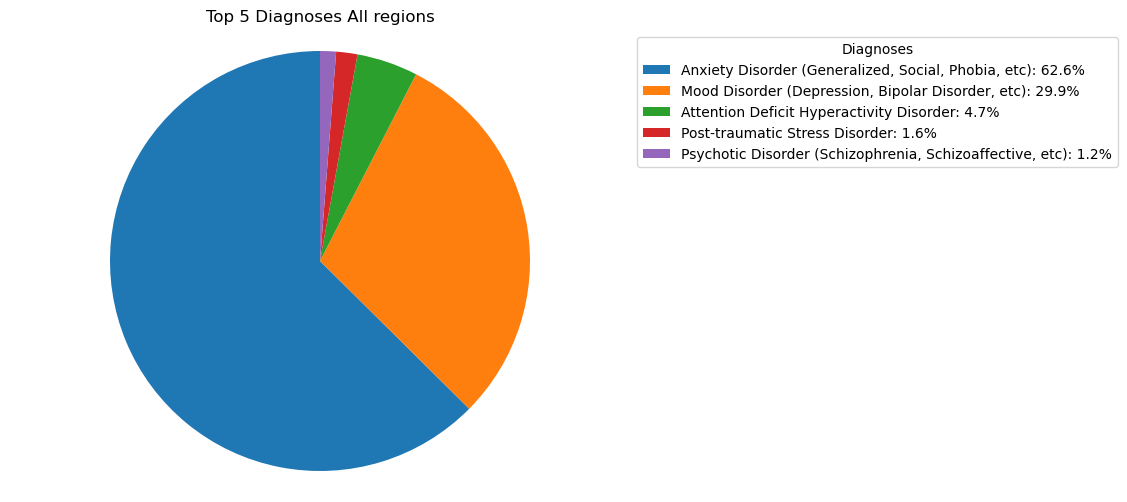

In [19]:
#check how many have been diagnosed by professional
filtered_diagnois_df = diagnosis_location_df[diagnosis_location_df['Diagnosed by professional?'] == 'Yes'].copy()

# Split the Diagnosis column and get the first part, so we don't get the extra text.
filtered_diagnois_df['Primary_Diagnosis'] = filtered_diagnois_df['Diagnosis'].str.split('|').str[0]

# Get unique primary diagnoses
unique_primary_diagnoses = filtered_diagnois_df['Primary_Diagnosis'].unique()
#print(unique_primary_diagnoses)

# Count the occurrences of each unique primary diagnosis
diagnosis_counts = filtered_diagnois_df['Primary_Diagnosis'].value_counts().head()#print only top 5 

# Print the counts
print(diagnosis_counts)

# Renaming diagnosis_counts to top 5 diagnoses
top_5_diagnosis = diagnosis_counts

# Calculate percentages
percentages = (top_5_diagnosis / top_5_diagnosis.sum()) * 100
labels = [f"{name}: {percent:.1f}%" for name, percent in zip(top_5_diagnosis.index, percentages)]

# Create a pie chart without percentages
plt.figure(figsize=(8, 6))
plt.pie(top_5_diagnosis, startangle=90)
plt.title('Top 5 Diagnoses All regions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a custom legend on the right side of the pie chart
plt.legend(labels, title="Diagnoses", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [20]:
#check how many have been diagnosed by professional & in USA


Primary_Diagnosis
Anxiety Disorder (Generalized, Social, Phobia, etc)         211
Mood Disorder (Depression, Bipolar Disorder, etc)           109
Attention Deficit Hyperactivity Disorder                     17
Post-traumatic Stress Disorder                                6
Psychotic Disorder (Schizophrenia, Schizoaffective, etc)      3
Name: count, dtype: int64
Primary_Diagnosis
Anxiety Disorder (Generalized, Social, Phobia, etc)         60.982659
Mood Disorder (Depression, Bipolar Disorder, etc)           31.502890
Attention Deficit Hyperactivity Disorder                     4.913295
Post-traumatic Stress Disorder                               1.734104
Psychotic Disorder (Schizophrenia, Schizoaffective, etc)     0.867052
Name: count, dtype: float64


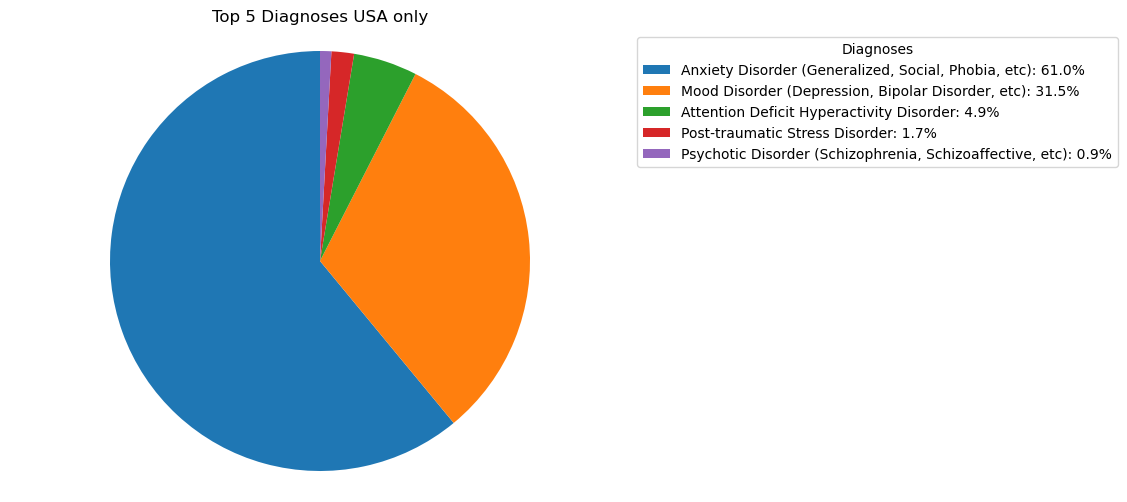

In [21]:
#check how many have been diagnosed by professional & in USA
USA_diagnois_df = diagnosis_location_df[(diagnosis_location_df['Location'] == 'United States of America') & 
                         (diagnosis_location_df['Diagnosed by professional?'] == 'Yes')].copy()

# Split the Diagnosis column and get the first part
USA_diagnois_df['Primary_Diagnosis'] = USA_diagnois_df['Diagnosis'].str.split('|').str[0]

# Get unique primary diagnoses
USA_unique_primary_diagnoses = USA_diagnois_df['Primary_Diagnosis'].unique()
#print(USA_unique_primary_diagnoses)

# Count the occurrences of each unique primary diagnosis
USA_diagnosis_counts = USA_diagnois_df['Primary_Diagnosis'].value_counts().head()  # Print only top 5

# Print the counts
print(USA_diagnosis_counts)

# Calculate percentages
percentages = (USA_diagnosis_counts / USA_diagnosis_counts.sum()) * 100
labels = [f"{name}: {percent:.1f}%" for name, percent in zip(USA_diagnosis_counts.index, percentages)]
print(percentages)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(USA_diagnosis_counts, startangle=90)
plt.title('Top 5 Diagnoses USA only')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a custom legend on the right side of the pie chart
plt.legend(labels, title="Diagnoses", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Primary_Diagnosis
Anxiety Disorder (Generalized, Social, Phobia, etc)         95
Mood Disorder (Depression, Bipolar Disorder, etc)           37
Attention Deficit Hyperactivity Disorder                     6
Psychotic Disorder (Schizophrenia, Schizoaffective, etc)     3
Post-traumatic Stress Disorder                               2
Name: count, dtype: int64


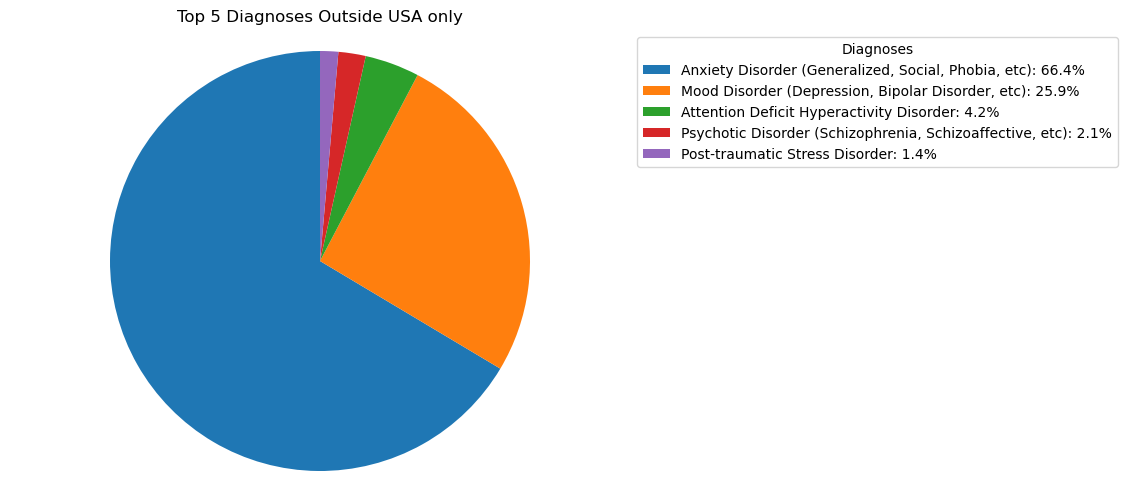

In [22]:
#check how many have been diagnosed by professional & Outside USA
Outside_USA_diagnois_df = diagnosis_location_df[(diagnosis_location_df['Location'] != 'United States of America') & 
                         (diagnosis_location_df['Diagnosed by professional?'] == 'Yes')].copy()

# Split the Diagnosis column and get the first part
Outside_USA_diagnois_df['Primary_Diagnosis'] = Outside_USA_diagnois_df['Diagnosis'].str.split('|').str[0]

# Get unique primary diagnoses
unique_Outside_USA_primary_diagnoses = Outside_USA_diagnois_df['Primary_Diagnosis'].unique()
#print(USA_unique_primary_diagnoses)

# Count the occurrences of each unique primary diagnosis
Outside_USA_diagnosis_counts = Outside_USA_diagnois_df['Primary_Diagnosis'].value_counts().head()  # Print only top 5

# Print the counts
print(Outside_USA_diagnosis_counts)

# Calculate percentages
percentages = (Outside_USA_diagnosis_counts / Outside_USA_diagnosis_counts.sum()) * 100
labels = [f"{name}: {percent:.1f}%" for name, percent in zip(Outside_USA_diagnosis_counts.index, percentages)]

#print(percentages)
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(Outside_USA_diagnosis_counts, startangle=90)
plt.title('Top 5 Diagnoses Outside USA only')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a custom legend on the right side of the pie chart
plt.legend(labels, title="Diagnoses", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

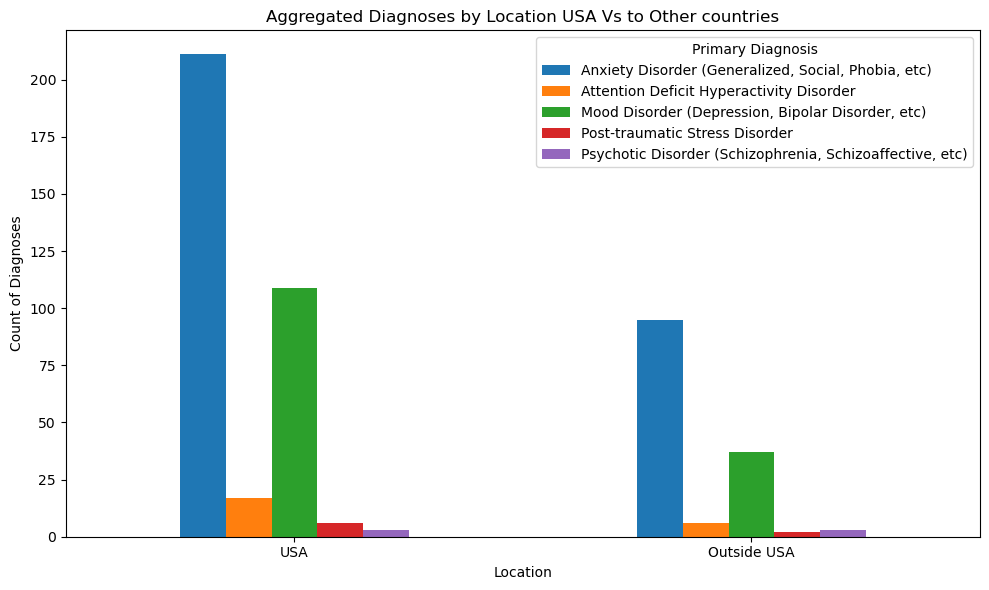

In [23]:
# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    'USA': USA_diagnosis_counts,
    'Outside USA': Outside_USA_diagnosis_counts
})

#combined_counts.T
# Transpose the DataFrame to have locations on the x-axis
#swap x and Y locations because locations was showing as legend by default and
#wanted it the other way arount
combined_counts = combined_counts.T

# Plotting No stack
combined_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Aggregated Diagnoses by Location USA Vs to Other countries')
plt.xlabel('Location')
plt.ylabel('Count of Diagnoses')
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.legend(title='Primary Diagnosis')
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig("output/TopDigagonsisBy Region.png")# save graph as image

plt.show()

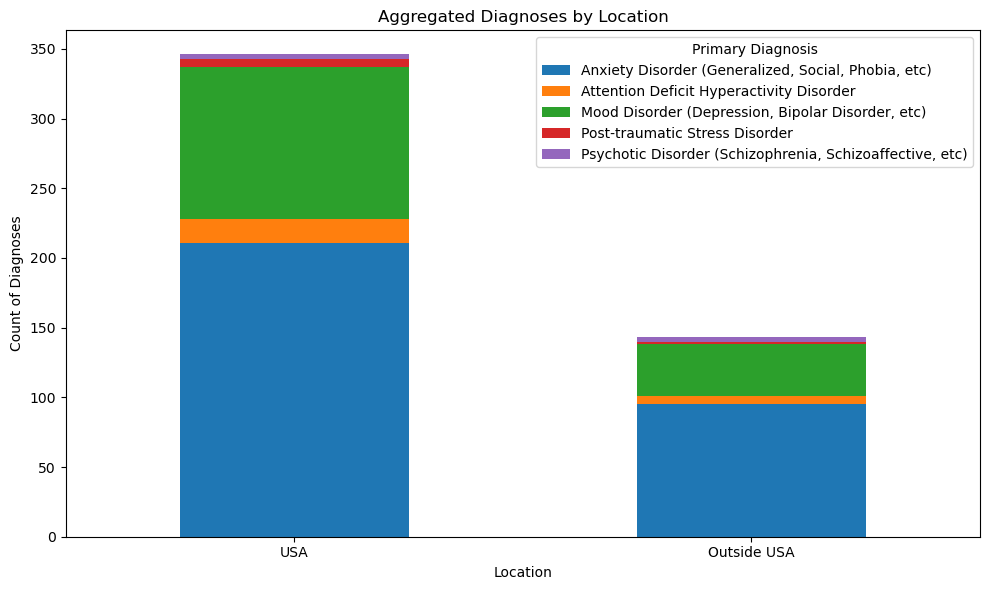

In [24]:
# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    'USA': USA_diagnosis_counts,
    'Outside USA': Outside_USA_diagnosis_counts
})

#combined_counts.T
# Transpose the DataFrame to have locations on the x-axis
#swap x and Y locations because locations was showing as legend by default and
#wanted it the other way arount
combined_counts = combined_counts.T


# Plotting Use stacked 
combined_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Aggregated Diagnoses by Location')
plt.xlabel('Location')
plt.ylabel('Count of Diagnoses')
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.legend(title='Primary Diagnosis')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [25]:
combined_counts

Primary_Diagnosis,"Anxiety Disorder (Generalized, Social, Phobia, etc)",Attention Deficit Hyperactivity Disorder,"Mood Disorder (Depression, Bipolar Disorder, etc)",Post-traumatic Stress Disorder,"Psychotic Disorder (Schizophrenia, Schizoaffective, etc)"
USA,211,17,109,6,3
Outside USA,95,6,37,2,3


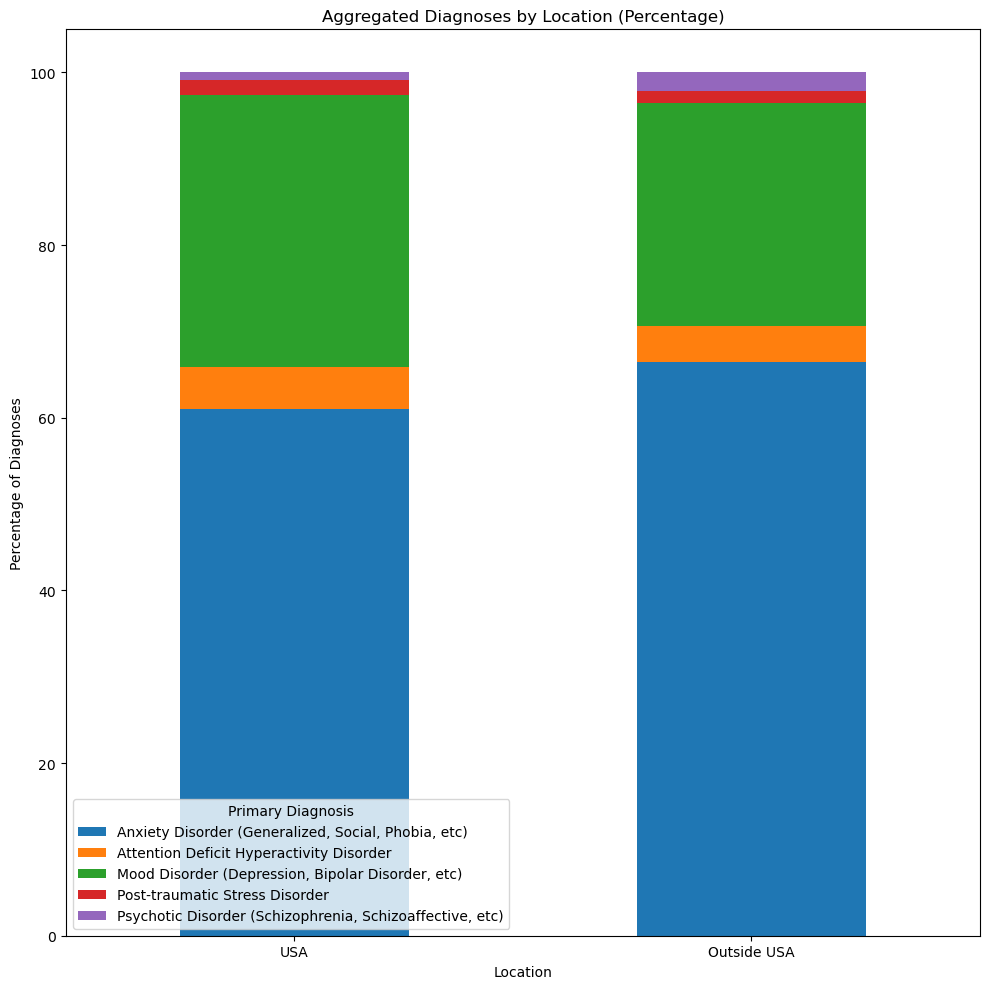

In [26]:
#Compare using percentage in bar graph????
# Normalize to get percentages
combined_counts_percentage = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100

# Plotting Use stacked 
combined_counts_percentage.plot(kind='bar', stacked=True, figsize=(10, 10))#adjust for size of bars
plt.title('Aggregated Diagnoses by Location (Percentage)')
plt.xlabel('Location')
plt.ylabel('Percentage of Diagnoses')
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.legend(title='Primary Diagnosis')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [27]:
#FIND out if help is offered by employeer

In [28]:
# Create a copy of the DataFrame
diagnosis_location_df = diagnosis_location_df.copy()

# Drop rows with NaN values in 'Diagnosis' column
diagnosis_location_df.dropna(subset=['Help offered?'], inplace=True)

# Display the cleaned DataFrame
#print(diagnosis_location_df_copy)
diagnosis_location_df

,Location,Diagnosis,Age,Diagnosed by professional?,Help offered?
1,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",29,Yes,Yes
4,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",43,Yes,No
5,United Kingdom,"Anxiety Disorder (Generalized, Social, Phobia,...",42,No,Yes
7,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",37,Yes,Yes
8,United States of America,"Mood Disorder (Depression, Bipolar Disorder, etc)",44,Yes,No
...,...,...,...,...,...
1424,Canada,"Anxiety Disorder (Generalized, Social, Phobia,...",22,Yes,No
1426,Canada,Attention Deficit Hyperactivity Disorder,26,Yes,I don't know
1427,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",38,Yes,No
1431,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",30,Yes,Yes


In [29]:
#check how many have help offered Outside of USA
Outside_USA_helpOffer_df = diagnosis_location_df[(diagnosis_location_df['Location'] != 'United States of America') & 
                         (diagnosis_location_df['Help offered?'] == 'Yes')].copy()

# Get responses/ make sure only yes returns
Outside_USA_helpOffer_count = Outside_USA_helpOffer_df['Help offered?'].unique()
#print(Outside_USA_helpOffer_count)
Outside_USA_helpOffer_count = Outside_USA_helpOffer_df['Help offered?'].value_counts()
Outside_USA_helpOffer_count

Help offered?
Yes    22
Name: count, dtype: int64

In [30]:
#No help of don't know outside USA
No_Outside_USA_helpOffer_df = diagnosis_location_df[
    (diagnosis_location_df['Location'] != 'United States of America') & 
    ((diagnosis_location_df['Help offered?'] == 'No') | 
     (diagnosis_location_df['Help offered?'] == "I don't know"))
].copy()


# Get responses/ make sure only No or idk returns
No_Outside_USA_helpOffer_count = No_Outside_USA_helpOffer_df['Help offered?'].unique()
#print(Outside_USA_helpOffer_count)
No_Outside_USA_helpOffer_count = No_Outside_USA_helpOffer_df['Help offered?'].value_counts()
No_Outside_USA_helpOffer_count

Help offered?
No              77
I don't know    23
Name: count, dtype: int64

In [31]:
#check how many have help offered in USA
USA_helpOffer_df = diagnosis_location_df[(diagnosis_location_df['Location'] == 'United States of America') & 
                         (diagnosis_location_df['Help offered?'] == 'Yes')].copy()

# Get responses/ make sure only yes returns
USA_helpOffer_count = USA_helpOffer_df['Help offered?'].unique()
#print(Outside_USA_helpOffer_count)
USA_helpOffer_count = USA_helpOffer_df['Help offered?'].value_counts()
USA_helpOffer_count
#only yes should return

Help offered?
Yes    106
Name: count, dtype: int64

In [32]:
#No help of don't know in USA
No_USA_helpOffer_df = diagnosis_location_df[
    (diagnosis_location_df['Location'] == 'United States of America') & 
    ((diagnosis_location_df['Help offered?'] == 'No') | 
     (diagnosis_location_df['Help offered?'] == "I don't know"))
].copy()


# Get responses/ make sure only No or idk returns
No_USA_helpOffer_count = No_USA_helpOffer_df['Help offered?'].unique()
#print(Outside_USA_helpOffer_count)
No_USA_helpOffer_count = No_USA_helpOffer_df['Help offered?'].value_counts()
No_USA_helpOffer_count
#only no and i dont know should return

Help offered?
No              130
I don't know     87
Name: count, dtype: int64

In [33]:
#combine all responses for USA 
# Create a DataFrame for Yes responses
yes_count = USA_helpOffer_count.get('Yes', 0)  # Get count of Yes, default to 0 if not found
yes_df = pd.DataFrame({'Response': ['Yes'], 'Count': [yes_count]})

# Create a DataFrame for No and I don't know responses
no_count = No_USA_helpOffer_count.get('No', 0)  # Get count of No, default to 0 if not found
idk_count = No_USA_helpOffer_count.get("I don't know", 0)  # Get count of I don't know, default to 0 if not found

no_df = pd.DataFrame({'Response': ['No', "I don't know"], 'Count': [no_count, idk_count]})

# Combine both DataFrames
combined_offer_df = pd.concat([yes_df, no_df], ignore_index=True)
combined_offer_df

,Response,Count
0,Yes,106
1,No,130
2,I don't know,87


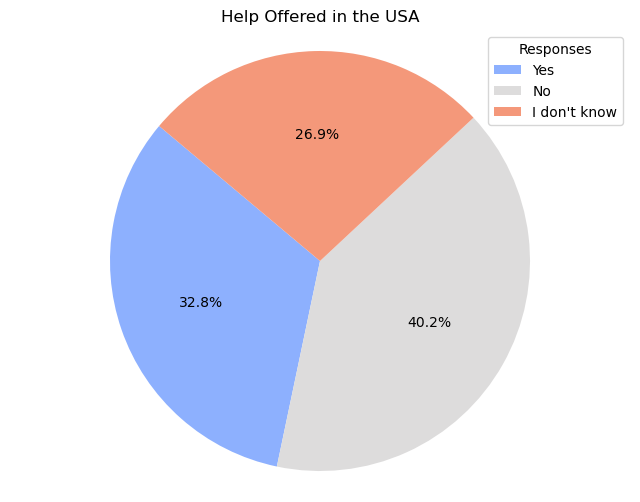

In [34]:
# Pie chart

colors = sns.color_palette("coolwarm", n_colors=len(combined_offer_df))

plt.figure(figsize=(8, 6))
plt.pie(combined_offer_df['Count'], autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Help Offered in the USA')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular

# Add legend
plt.legend(combined_offer_df['Response'], title="Responses", loc="upper right")
plt.show()

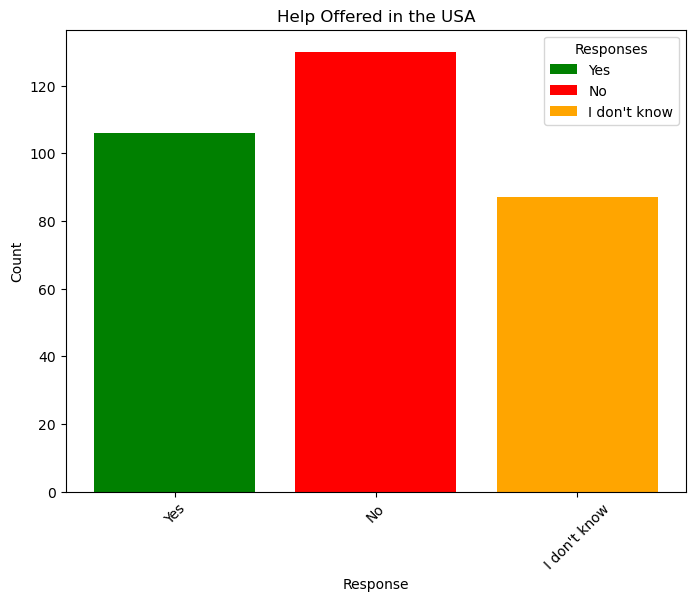

In [35]:
# Bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(combined_offer_df['Response'], combined_offer_df['Count'], color=['green', 'red', 'orange'], label=combined_offer_df['Response'])
plt.title('Help Offered in the USA')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add legend
plt.legend(title="Responses")
plt.show()

In [36]:
# Combine all responses for Outside of USA 

# Create a DataFrame for Yes responses
yes_count_outside = Outside_USA_helpOffer_df['Help offered?'].value_counts().get('Yes', 0)

# No help or don't know outside USA
No_Outside_USA_helpOffer_df = diagnosis_location_df[
    (diagnosis_location_df['Location'] != 'United States of America') & 
    ((diagnosis_location_df['Help offered?'] == 'No') | 
     (diagnosis_location_df['Help offered?'] == "I don't know"))
].copy()

# Get counts for No and I don't know
no_count_outside = No_Outside_USA_helpOffer_df['Help offered?'].value_counts().get('No', 0)
idk_count_outside = No_Outside_USA_helpOffer_df['Help offered?'].value_counts().get("I don't know", 0)

# Create DataFrame for combined counts
combined_outside_offer_df = pd.DataFrame({
    'Response': ['Yes', 'No', "I don't know"],
    'Count': [yes_count_outside, no_count_outside, idk_count_outside]
})
combined_outside_offer_df

,Response,Count
0,Yes,22
1,No,77
2,I don't know,23


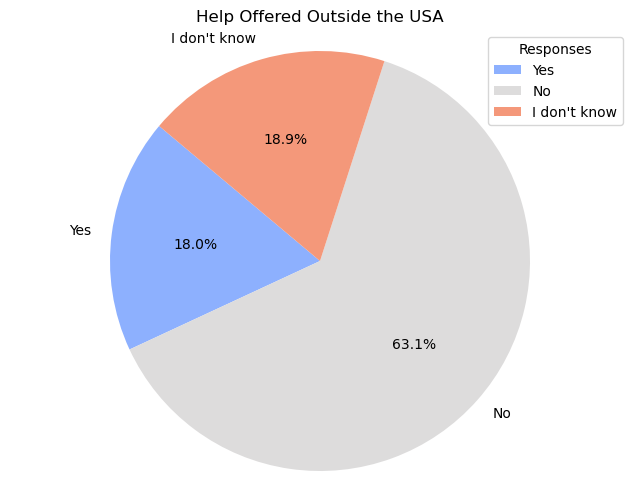

In [37]:
# Pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("coolwarm", n_colors=len(combined_outside_offer_df))

plt.pie(combined_outside_offer_df['Count'], labels=combined_outside_offer_df['Response'], 
        autopct='%1.1f%%', startangle=140, colors=colors)

#colors=sns.color_palette('viridis')
plt.title('Help Offered Outside the USA')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.legend(combined_outside_offer_df['Response'], title="Responses", loc="upper right")
plt.show()

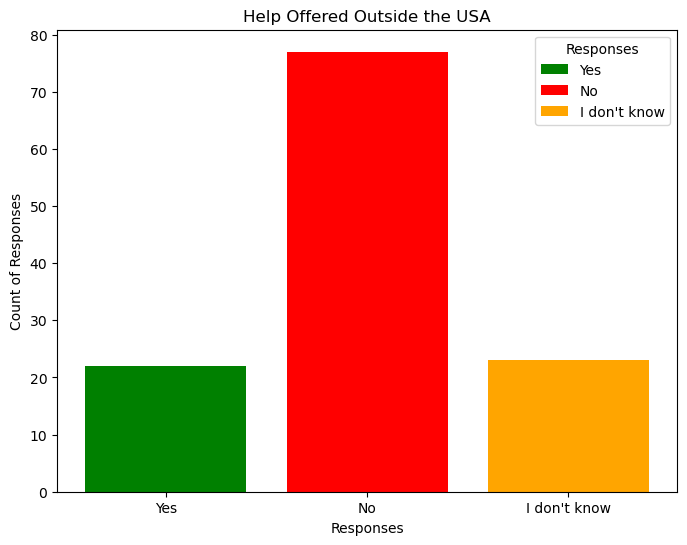

In [38]:
# Bar graph
plt.figure(figsize=(8, 6))

bars = plt.bar(combined_outside_offer_df['Response'], combined_outside_offer_df['Count'], 
                color=['green', 'red', 'orange'], 
                label=combined_outside_offer_df['Response'])

plt.title('Help Offered Outside the USA')
plt.xlabel('Responses')
plt.ylabel('Count of Responses')
plt.xticks(rotation=0)

# Add legend using the bar labels
plt.legend(combined_outside_offer_df['Response'], title="Responses")
plt.show()

In [39]:
# Create DataFrame for Help Offered Outside the USA
yes_count_outside = combined_outside_offer_df.loc[combined_outside_offer_df['Response'] == 'Yes', 'Count'].values[0]
no_count_outside = combined_outside_offer_df.loc[combined_outside_offer_df['Response'] == 'No', 'Count'].values[0]
idk_count_outside = combined_outside_offer_df.loc[combined_outside_offer_df['Response'] == "I don't know", 'Count'].values[0]

# Create DataFrame for Help Offered Inside the USA
yes_count_USA = combined_offer_df.loc[combined_offer_df['Response'] == 'Yes', 'Count'].values[0]
no_count_USA = combined_offer_df.loc[combined_offer_df['Response'] == 'No', 'Count'].values[0]
idk_count_USA = combined_offer_df.loc[combined_offer_df['Response'] == "I don't know", 'Count'].values[0]

# Create a new DataFrame for stacked bar chart
stacked_data = pd.DataFrame({
    'Response': ['Yes', 'No', "I don't know"],
    'Outside USA': [yes_count_outside, no_count_outside, idk_count_outside],
    'Inside USA': [yes_count_USA, no_count_USA, idk_count_USA]
})

# Set the index to Response for easier plotting
stacked_data.set_index('Response', inplace=True)

# Display the stacked data
print("\nStacked Data:")
print(stacked_data)


Stacked Data:
              Outside USA  Inside USA
Response                             
Yes                    22         106
No                     77         130
I don't know           23          87


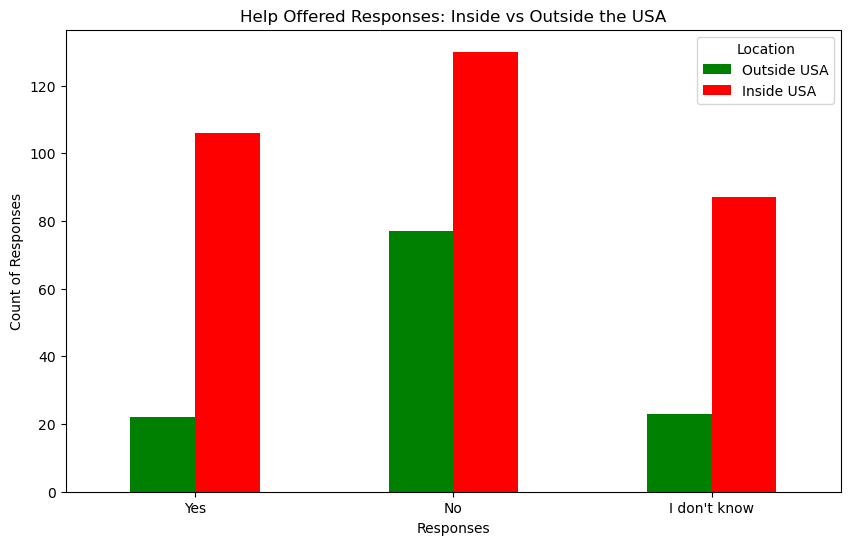

In [40]:
stacked_data.plot(kind='bar', stacked=False, color=['green', 'red', 'orange'], figsize=(10, 6))


plt.title('Help Offered Responses: Inside vs Outside the USA')
plt.xlabel('Responses')
plt.ylabel('Count of Responses')
plt.xticks(rotation=0)
plt.legend(title="Location", labels=['Outside USA', 'Inside USA'])
plt.show()

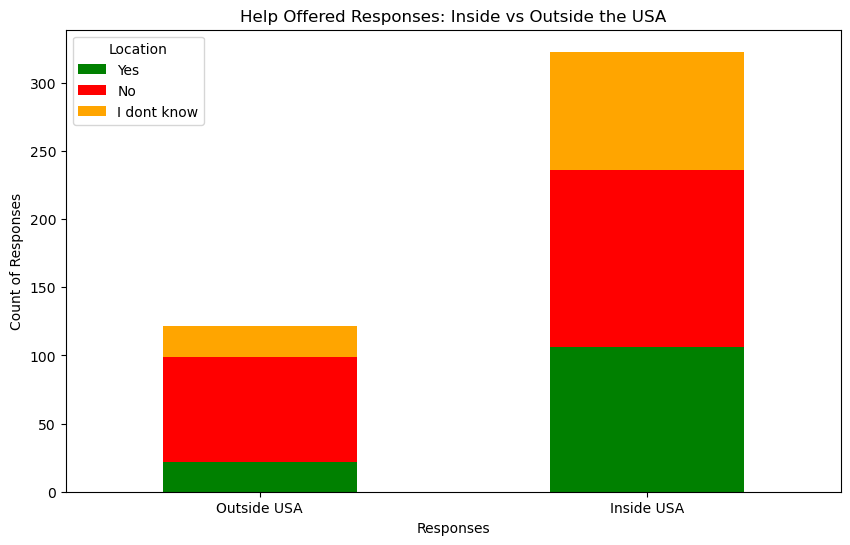

In [41]:
#changed y and x axis
stacked_data = stacked_data.T 


stacked_data.plot(kind='bar', stacked=True, color=['green', 'red', 'orange'], figsize=(10, 6))


plt.title('Help Offered Responses: Inside vs Outside the USA')
plt.xlabel('Responses')
plt.ylabel('Count of Responses')
plt.xticks(rotation=0)
plt.legend(title="Location", labels=['Yes', 'No', 'I dont know'])
plt.show()

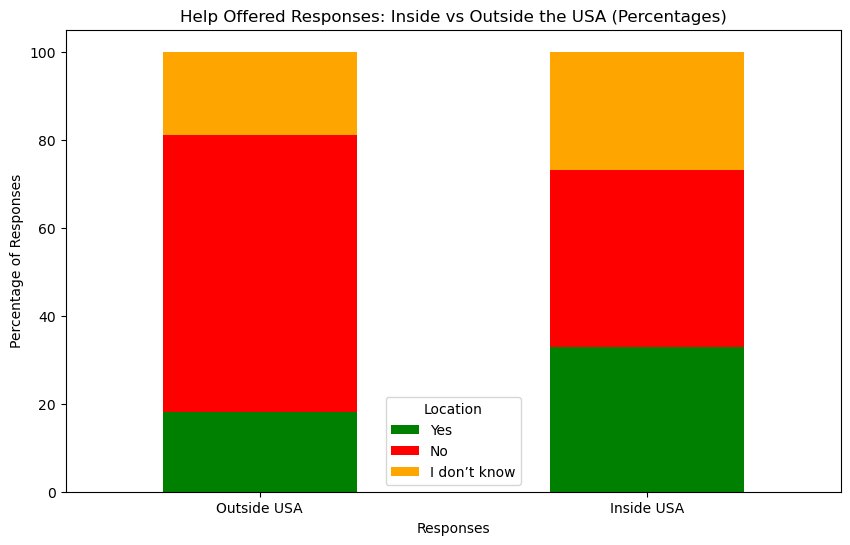

In [42]:
# Normalize the data to get percentages
percentage_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart with percentages
percentage_data.plot(kind='bar', stacked=True, color=['green', 'red', 'orange'], figsize=(10, 6))

plt.title('Help Offered Responses: Inside vs Outside the USA (Percentages)')
plt.xlabel('Responses')
plt.ylabel('Percentage of Responses')
plt.xticks(rotation=0)
plt.legend(title="Location", labels=['Yes', 'No', 'I don’t know'])

plt.savefig("output/HelpOfferedInWorkplaces.png")# save graph as image


plt.show()

In [43]:
percentage_data

Response,Yes,No,I don't know
Outside USA,18.032787,63.114754,18.852459
Inside USA,32.817337,40.247678,26.934985


Data percentages USA yes: 33%, NO: 40%, IDK: 27%


Outside USA: YES: 18%, no: 63%, IDK: 19%


Our data indicates that 33% of respondents in the USA reported that their workplace offers mental health support, compared to only 18% of respondents from countries outside the USA. 


In the USA, 40% responded "No" and 27% answered, "I don't know." Compared to outside the USA, 63% responded "No" and 19% said "I don't know."
These findings suggest that while both regions have significant portions of individuals who are uncertain or do not receive mental health support, the USA demonstrates a greater emphasis on mental health initiatives in the workplace. 


This reinforces the notion that mental health may be prioritized more highly in the USA compared to other countries.


In [44]:
#Loku code

In [45]:
file_path = Path('files/mental_heath_2016.csv')

# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Rename columns for clarity (if needed)
data_df.rename(columns={
    'What is your gender?': 'Gender',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'Treatment'
}, inplace=True)

# Display the first few rows of the DataFrame
data_df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,Gender,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [46]:
# Filter the data for males and females
male_data = data_df[data_df['Gender'].str.lower() == 'male']
female_data = data_df[data_df['Gender'].str.lower() == 'female']

# Analyze the data to see how many sought treatment (for '1' responses in 'Treatment', which represents 'Yes')
male_treatment_count = male_data['Treatment'].value_counts().get(1, 0)
female_treatment_count = female_data['Treatment'].value_counts().get(1, 0)

# Create a DataFrame for comparison
gender_comparison_df = pd.DataFrame({
    'Male': [male_treatment_count],
    'Female': [female_treatment_count]
})

# Print the comparison DataFrame
print(gender_comparison_df)

   Male  Female
0   457     183


In [47]:
# Clean the 'Treatment' column to standardize values (e.g., 'Yes' and '1' mean the same thing)
data_df['Treatment'] = data_df['Treatment'].replace({'Yes': 1, 'No': 0})

# Filter the data again after standardizing 'Treatment'
male_data = data_df[data_df['Gender'].str.lower() == 'male']
female_data = data_df[data_df['Gender'].str.lower() == 'female']

# Re-calculate treatment counts
male_treatment_count = male_data['Treatment'].value_counts().get(1, 0)
female_treatment_count = female_data['Treatment'].value_counts().get(1, 0)


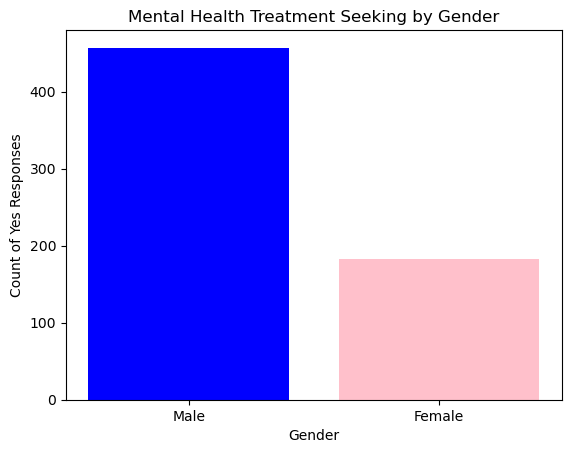

In [48]:
# Plot the comparison
labels = ['Male', 'Female']
values = [male_treatment_count, female_treatment_count]

plt.bar(labels, values, color=['blue', 'pink'])
plt.title('Mental Health Treatment Seeking by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Yes Responses')
plt.show()

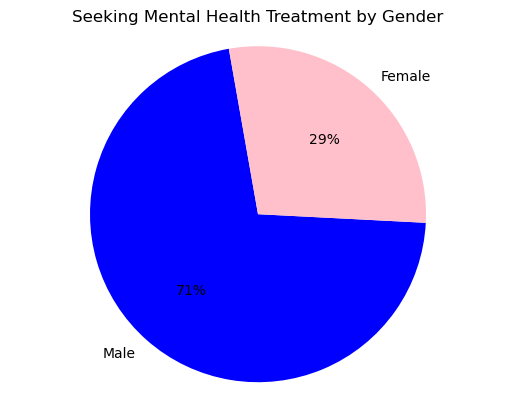

In [49]:
# Data for the pie chart
sizes = [male_treatment_count, female_treatment_count]
labels = ['Male', 'Female']

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=100, colors=['blue', 'pink'])  # Display whole numbers for percentages
plt.title('Seeking Mental Health Treatment by Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.savefig("output/GenderSeekHelpBar.png")# save graph as image


# Show the chart
plt.show()


In [50]:
# Print the column names to check for any differences
#print(data_df.columns)


   Male  Female
0   274     140


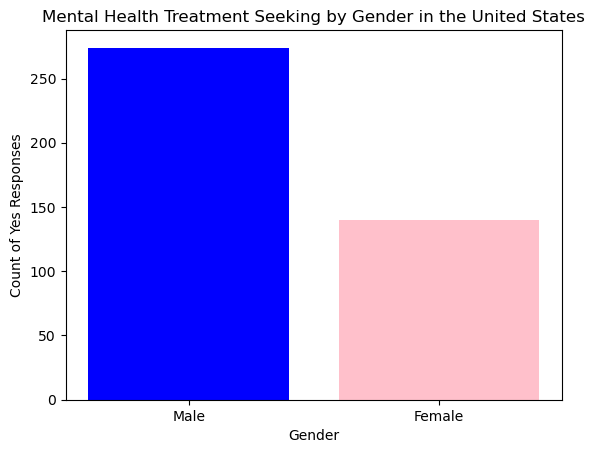

In [51]:
file_path = Path('files/mental_heath_2016.csv')


# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Rename columns for clarity (if needed)
data_df.rename(columns={
    'What is your gender?': 'Gender',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'Treatment',
    'What country do you live in?': 'Country'
}, inplace=True)

# Filter the data for people living in the United States
us_data = data_df[data_df['Country'].str.lower() == 'united states of america']

# Filter for males and females in the United States
us_male_data = us_data[us_data['Gender'].str.lower() == 'male']
us_female_data = us_data[us_data['Gender'].str.lower() == 'female']

# Analyze the data to see how many sought treatment (for '1' responses in 'Treatment', which represents 'Yes')
us_male_treatment_count = us_male_data['Treatment'].value_counts().get(1, 0)
us_female_treatment_count = us_female_data['Treatment'].value_counts().get(1, 0)

# Create a DataFrame for comparison
us_gender_comparison_df = pd.DataFrame({
    'Male': [us_male_treatment_count],
    'Female': [us_female_treatment_count]
})

# Print the comparison DataFrame
print(us_gender_comparison_df)

# Plot the comparison
labels = ['Male', 'Female']
values = [us_male_treatment_count, us_female_treatment_count]

plt.bar(labels, values, color=['blue', 'pink'])
plt.title('Mental Health Treatment Seeking by Gender in the United States')
plt.xlabel('Gender')
plt.ylabel('Count of Yes Responses')
plt.show()

   Male  Female
0   183      43


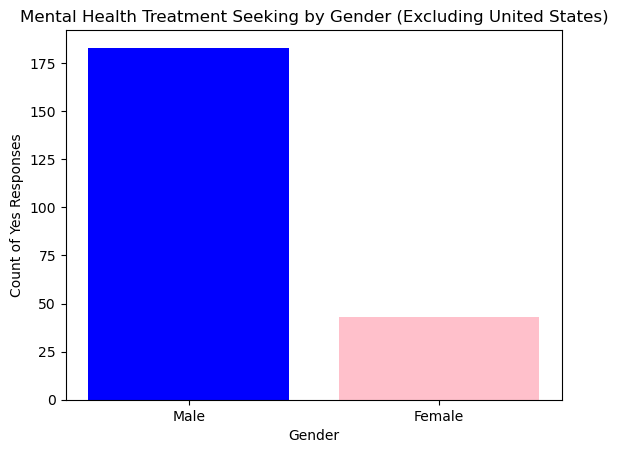

In [52]:
# Filter the data for people NOT living in the United States
non_us_data = data_df[data_df['Country'].str.lower() != 'united states of america']

# Filter for males and females in non-US data
non_us_male_data = non_us_data[non_us_data['Gender'].str.lower() == 'male']
non_us_female_data = non_us_data[non_us_data['Gender'].str.lower() == 'female']

# Analyze the data to see how many sought treatment (for '1' responses in 'Treatment', which represents 'Yes')
non_us_male_treatment_count = non_us_male_data['Treatment'].value_counts().get(1, 0)
non_us_female_treatment_count = non_us_female_data['Treatment'].value_counts().get(1, 0)

# Create a DataFrame for comparison
non_us_gender_comparison_df = pd.DataFrame({
    'Male': [non_us_male_treatment_count],
    'Female': [non_us_female_treatment_count]
})

# Print the comparison DataFrame
print(non_us_gender_comparison_df)

# Plot the comparison
labels = ['Male', 'Female']
values = [non_us_male_treatment_count, non_us_female_treatment_count]

plt.bar(labels, values, color=['blue', 'pink'])
plt.title('Mental Health Treatment Seeking by Gender (Excluding United States)')
plt.xlabel('Gender')
plt.ylabel('Count of Yes Responses')
plt.show()



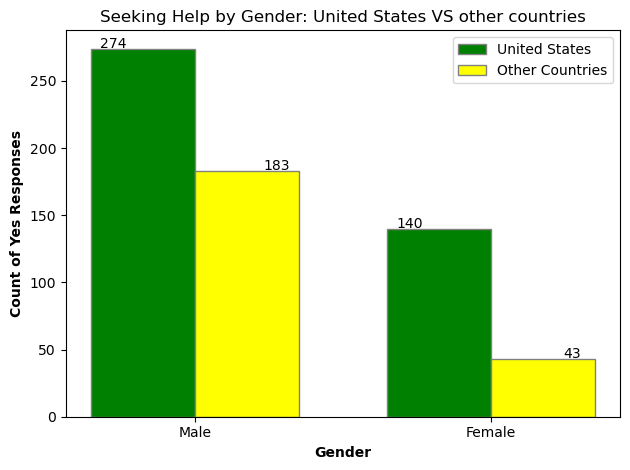

In [53]:


# Filter the data for people living in the United States
us_data = data_df[data_df['Country'].str.lower() == 'united states of america']

# Filter for males and females in the United States
us_male_data = us_data[us_data['Gender'].str.lower() == 'male']
us_female_data = us_data[us_data['Gender'].str.lower() == 'female']

# Analyze the data to see how many sought treatment (for '1' responses in 'Treatment', which represents 'Yes')
us_male_treatment_count = us_male_data['Treatment'].value_counts().get(1, 0)
us_female_treatment_count = us_female_data['Treatment'].value_counts().get(1, 0)

# Filter the data for people NOT living in the United States
non_us_data = data_df[data_df['Country'].str.lower() != 'united states of america']

# Filter for males and females in non-US data
non_us_male_data = non_us_data[non_us_data['Gender'].str.lower() == 'male']
non_us_female_data = non_us_data[non_us_data['Gender'].str.lower() == 'female']

# Analyze the data to see how many sought treatment in other countries
non_us_male_treatment_count = non_us_male_data['Treatment'].value_counts().get(1, 0)
non_us_female_treatment_count = non_us_female_data['Treatment'].value_counts().get(1, 0)

# Prepare data for plotting
labels = ['Male', 'Female']
us_values = [us_male_treatment_count, us_female_treatment_count]
non_us_values = [non_us_male_treatment_count, non_us_female_treatment_count]

# Set the width for the bars
bar_width = 0.35

# Create the positions for the bars
r1 = range(len(labels))  # Positions for the first set of bars (US)
r2 = [x + bar_width for x in r1]  # Positions for the second set of bars (Non-US)

# Create the bar plot
plt.bar(r1, us_values, color='green', width=bar_width, edgecolor='grey', label='United States')
plt.bar(r2, non_us_values, color='yellow', width=bar_width, edgecolor='grey', label='Other Countries')

# Adding labels and title
plt.xlabel('Gender', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels)
plt.ylabel('Count of Yes Responses', fontweight='bold')
plt.title('Seeking Help by Gender: United States VS other countries')
plt.legend()


# Annotate the bars with the count of responses
for i in range(len(us_values)):
    plt.text(i - 0.1, us_values[i] + 0.5, str(us_values[i]), ha='center', color='black')
    plt.text(i + bar_width + 0.1, non_us_values[i] + 0.5, str(non_us_values[i]), ha='center', color='black')


# Show the plot
plt.tight_layout()
plt.savefig("output/GenderCountriesSeekHelp.png")# save graph as image

plt.show()


In [54]:
#Lishi Code

In [55]:
# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Display the DataFrame
data_df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [56]:
# Create a list of selected column indices
selected_columns = [22, 23, 47, 48,53,54, 55, 56, 57, 58, 59, 60, 61]

# Use the selected columns to create a new DataFrame
Lishi_selected_data = data_df.copy().iloc[:, selected_columns]

Lishi_selected_data.head()
print(Lishi_selected_data.columns.tolist())  # This will print a list of the column names

['Do you believe your productivity is ever affected by a mental health issue?', 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?', 'Do you currently have a mental health disorder?', 'If yes, what condition(s) have you been diagnosed with?', 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?', 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?', 'What is your age?', 'What is your gender?', 'What country do you live in?', 'What US state or territory do you live in?', 'What country do you work in?', 'What US state or territory do you work in?', 'Which of the following best describes your work position?']


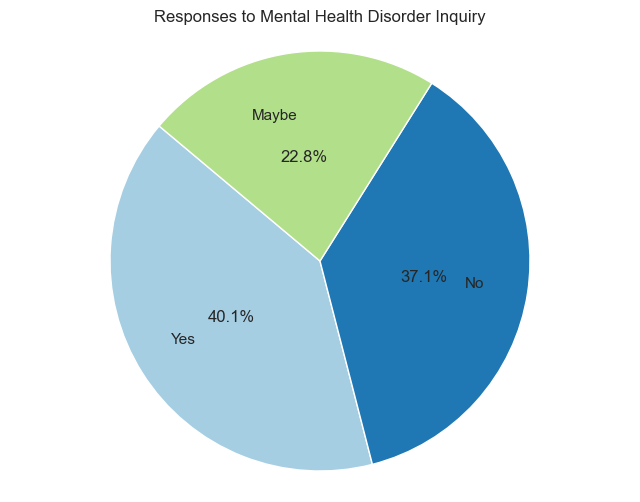

In [57]:
#select the 'Do you currently have a mental health disorder'
df = pd.DataFrame(Lishi_selected_data, columns=['Do you currently have a mental health disorder?'])
# Count occurrences of each response category
response_counts = df['Do you currently have a mental health disorder?'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie chart
plt.pie(response_counts['Count'], 
        labels=response_counts['Response'],  
        autopct='%1.1f%%', 
        pctdistance=0.5,
        labeldistance=0.7,
        startangle=140, 
        colors=sns.color_palette('Paired', len(response_counts)))

# Add a title
plt.title('Responses to Mental Health Disorder Inquiry')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

plt.savefig("output/MentalDisorderInquiry.png")# save graph as image

plt.show()


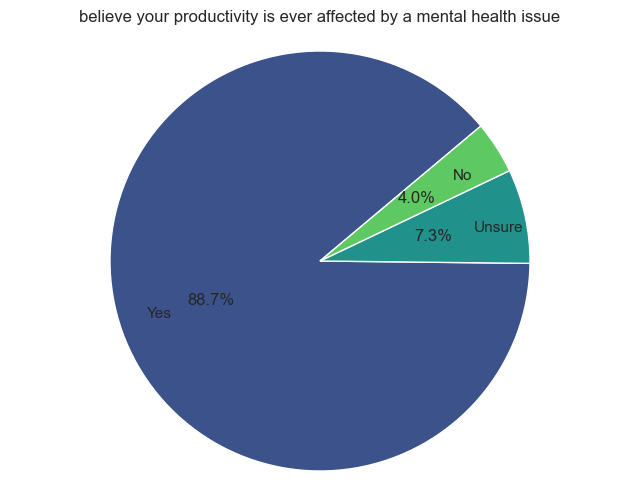

In [58]:
interfere_data = Lishi_selected_data[Lishi_selected_data['Do you currently have a mental health disorder?'] == 'Yes']
interfere_data_1 = pd.DataFrame(interfere_data, columns=['Do you believe your productivity is ever affected by a mental health issue?'])
# Count occurrences of each response category
response_counts = interfere_data_1['Do you believe your productivity is ever affected by a mental health issue?'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))


# Create a pie chart
plt.pie(response_counts['Count'], 
        labels=response_counts['Response'], 
        autopct='%1.1f%%', 
        startangle=40, 
        pctdistance=0.55,
        labeldistance=0.75,
        colors=sns.color_palette('viridis', len(response_counts)))

# Add a title
plt.title('believe your productivity is ever affected by a mental health issue')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


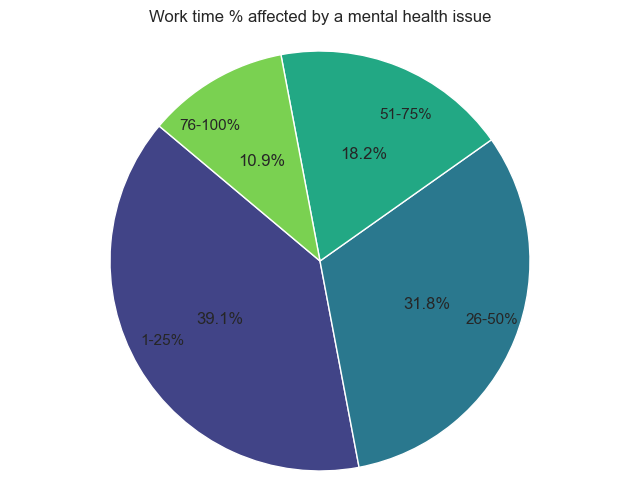

In [70]:
interfere_data = Lishi_selected_data[Lishi_selected_data['Do you currently have a mental health disorder?'] == 'Yes']
interfere_percentage_data = interfere_data[interfere_data['Do you believe your productivity is ever affected by a mental health issue?'] == 'Yes']
interfere_percentage_data = pd.DataFrame(interfere_percentage_data, columns=['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'])

# Count occurrences of each response category
response_counts = interfere_percentage_data['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie chart
plt.pie(response_counts['Count'], 
        labels=response_counts['Response'], 
        autopct='%1.1f%%', 
        startangle=140, 
        pctdistance=0.55,
        labeldistance=0.75,
        colors=sns.color_palette('viridis', len(response_counts)))

# Add a title
plt.title('Work time % affected by a mental health issue')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

plt.savefig("output/WorkAffectedPercentage.png")# save graph as image

plt.show()


In [60]:
Region_df = Lishi_selected_data[Lishi_selected_data['What country do you live in?'] == 'United States of America']

In [61]:
Region_df1 = Region_df.copy().rename(columns={
    'What US state or territory do you live in?': 'State/Territory',
    'Do you currently have a mental health disorder?': 'Mental Health Disorder'
})

# Step 2: Count occurrences of each state/territory
state_counts = Region_df1['State/Territory'].value_counts().reset_index()
state_counts.columns = ['State/Territory', 'Count']

# Step 3: Merge counts back to original DataFrame
Region_df1 = Region_df1.merge(state_counts, on='State/Territory')

# Step 4: Sort the original DataFrame by Count
Region_df_sorted = Region_df1.sort_values(by='Count', ascending=False)

# Step 5: Filter the DataFrame for counts greater than 20
Region_df_filtered = Region_df_sorted[Region_df_sorted['Count'] > 20]
# Display the sorted DataFrame
Region_df_filtered.head()

,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Mental Health Disorder,"If yes, what condition(s) have you been diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,State/Territory,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Count
461,NaN,NaN,Maybe,NaN,Rarely,Sometimes,32,female,United States of America,California,United States of America,California,Other,130
101,NaN,NaN,Yes,NaN,Not applicable to me,Not applicable to me,21,Male,United States of America,California,United States of America,California,Dev Evangelist/Advocate,130
745,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Sometimes,Often,24,Genderflux demi-girl,United States of America,California,United States of America,California,DevOps/SysAdmin|Support|Back-end Developer|Fro...,130
744,NaN,NaN,Maybe,NaN,Often,Often,25,male,United States of America,California,United States of America,California,Back-end Developer|DevOps/SysAdmin,130
246,NaN,NaN,No,NaN,Not applicable to me,Not applicable to me,27,male,United States of America,California,United States of America,California,Back-end Developer,130


In [62]:
# Step 1: Count total responses for each State/Territory
total_counts = Region_df_filtered['State/Territory'].value_counts().reset_index()
total_counts.columns = ['State/Territory', 'Total Responses']

# Step 2: Count occurrences of each response type for each region
response_counts = Region_df_filtered.groupby(['State/Territory', 'Mental Health Disorder']).size().unstack(fill_value=0)

# Step 3: Combine total responses with response counts
# Resetting index to merge back with total counts
response_counts.reset_index(inplace=True)

# Merge total counts with response counts
final_counts = pd.merge(total_counts, response_counts, on='State/Territory', how='left')

# Step 4: Calculate the percentage of "Yes" and "Maybe" responses
final_counts['Total with Disorder'] = final_counts.get('Yes', 0) + final_counts.get('Maybe', 0)
final_counts['Percentage with Disorder'] = (
    final_counts['Total with Disorder'] / final_counts['Total Responses'] * 100
)

# Display the final DataFrame with percentages
final_counts.head(50)  # A # Adjust to show more or fewer rows as needed
print(final_counts)

   State/Territory  Total Responses  Maybe  No  Yes  Total with Disorder  \
0       California              130     27  43   60                   87   
1         Illinois               56      8  18   30                   38   
2         Michigan               48     13  17   18                   31   
3         New York               45      9  13   23                   32   
4       Washington               43     12  12   19                   31   
5            Texas               43     13   8   22                   35   
6        Minnesota               42      7  15   20                   27   
7           Oregon               37      4  13   20                   24   
8     Pennsylvania               33      5   8   20                   25   
9         Colorado               28      8   7   13                   21   
10       Tennessee               27      5   9   13                   18   
11            Ohio               25      7   6   12                   19   
12         I

In [63]:
import requests
weather_api_key = "5b60fafe7144a49bd839ed0ebc4a69e9"

# Geoapify API Key
#geoapify_key = "85b7f2f9a4c2467397f36be13ffa744b"

url = 'http://api.openweathermap.org/data/2.5/weather'

In [64]:

# Mapping states/territories to their major cities
state_to_city = {
    'California': 'Los Angeles',
    'Illinois': 'Chicago',
    'Michigan': 'Detroit',
    'New York': 'New York City',
    'Washington': 'Seattle',
    'Texas': 'Houston',
    'Minnesota': 'Minneapolis',
    'Oregon': 'Portland',
    'Pennsylvania': 'Philadelphia',
    'Colorado': 'Denver',
    'Tennessee': 'Nashville',
    'Ohio': 'Columbus',
    'Indiana': 'Indianapolis',
    'Massachusetts': 'Boston',
    'Florida': 'Miami',
    'North Carolina': 'Charlotte'
}

final_counts['City'] = final_counts['State/Territory'].map(state_to_city)
final_counts.head()

,State/Territory,Total Responses,Maybe,No,Yes,Total with Disorder,Percentage with Disorder,City
0,California,130,27,43,60,87,66.923077,Los Angeles
1,Illinois,56,8,18,30,38,67.857143,Chicago
2,Michigan,48,13,17,18,31,64.583333,Detroit
3,New York,45,9,13,23,32,71.111111,New York City
4,Washington,43,12,12,19,31,72.093023,Seattle


In [65]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our DataFrame to fetch weather data
for i, row in final_counts.iterrows():
    city = row['City']

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&units=imperial&q={city}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except Exception as e:
        print(f"Error retrieving data for {city}: {e}")

# Create a DataFrame from the city data
weather_df = pd.DataFrame(city_data)

# Convert both 'City' columns in final_counts and weather_df to string type, if necessary
final_counts['City'] = final_counts['City'].astype(str)
weather_df['City'] = weather_df['City'].astype(str)

# Merge the two DataFrames on the 'City' column
merged_df = pd.merge(final_counts, weather_df, on='City', how='left')

# Display the merged DataFrame
merged_df.head()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Los Angeles
Processing Record 2 of Set 1 | Chicago
Processing Record 3 of Set 1 | Detroit
Processing Record 4 of Set 1 | New York City
Processing Record 5 of Set 1 | Seattle
Processing Record 6 of Set 1 | Houston
Processing Record 7 of Set 1 | Minneapolis
Processing Record 8 of Set 1 | Portland
Processing Record 9 of Set 1 | Philadelphia
Processing Record 10 of Set 1 | Denver
Processing Record 11 of Set 1 | Nashville
Processing Record 12 of Set 1 | Columbus
Processing Record 13 of Set 1 | Indianapolis
Processing Record 14 of Set 1 | Boston
Processing Record 15 of Set 1 | Miami
Processing Record 16 of Set 1 | Charlotte


,State/Territory,Total Responses,Maybe,No,Yes,Total with Disorder,Percentage with Disorder,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,California,130,27,43,60,87,66.923077,Los Angeles,34.0522,-118.2437,78.33,46,1,2.89,US,1728271309
1,Illinois,56,8,18,30,38,67.857143,Chicago,41.8500,-87.6500,61.79,41,0,9.89,US,1728271215
2,Michigan,48,13,17,18,31,64.583333,Detroit,42.3314,-83.0458,61.11,43,0,9.86,US,1728271518
3,New York,45,9,13,23,32,71.111111,New York City,40.7143,-74.0060,65.88,68,61,10.98,US,1728271505
4,Washington,43,12,12,19,31,72.093023,Seattle,47.6062,-122.3321,59.92,59,3,0.38,US,1728271421


In [66]:
# Convert both 'City' columns in final_counts and weather_df to string type, if necessary
final_counts['City'] = final_counts['City'].astype(str)
weather_df['City'] = weather_df['City'].astype(str)

# Merge the two DataFrames on the 'City' column
merged_df = pd.merge(final_counts, weather_df, on='City', how='left')

# Display the merged DataFrame
merged_df.head()

,State/Territory,Total Responses,Maybe,No,Yes,Total with Disorder,Percentage with Disorder,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,California,130,27,43,60,87,66.923077,Los Angeles,34.0522,-118.2437,78.33,46,1,2.89,US,1728271309
1,Illinois,56,8,18,30,38,67.857143,Chicago,41.8500,-87.6500,61.79,41,0,9.89,US,1728271215
2,Michigan,48,13,17,18,31,64.583333,Detroit,42.3314,-83.0458,61.11,43,0,9.86,US,1728271518
3,New York,45,9,13,23,32,71.111111,New York City,40.7143,-74.0060,65.88,68,61,10.98,US,1728271505
4,Washington,43,12,12,19,31,72.093023,Seattle,47.6062,-122.3321,59.92,59,3,0.38,US,1728271421


In [67]:
# Configure the map plot
map_plot = merged_df.hvplot.points(
    x='Lng',
    y='Lat',
    size=merged_df['Percentage with Disorder'] * 3,  # Size of points based on humidity
    color='City',  # Optional: color points based on humidity
    alpha=0.65,        # Transparency of points
    tiles='OSM',      # Use OpenStreetMap tiles for the background
    geo=True,          # Treat coordinates as geographic data
    title='Mental health of each city ',  # Title of the map
    frame_width=800,                        # Width of the plot
    frame_height=500 ,
    hover_cols=['City','Percentage with Disorder']
)

map_plot

C:\Users\keega\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,_size,Percentage with Disorder)

In [68]:
merged_df_sorted = merged_df.sort_values(by='Percentage with Disorder', ascending=False)
# Create a bar plot of Percentage with Disorder by City
bar_plot = merged_df_sorted.hvplot.bar(
    x='City',
    y='Percentage with Disorder',
    title='Percentage with Disorder by City',
    xlabel='City',
    ylabel='Percentage with Disorder (%)',
    rot=45,  # Rotate the x-axis labels for better readability
    width=900,  # Width of the plot
    height=500,  # Height of the plot
    color ='Percentage with Disorder'  # Optional: Color by city for visual distinction
)

# Show the plot
bar_plot


:Bars   [City]   (Percentage with Disorder)

In [69]:
#added this file - Keegan